In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

In [2]:
# Train data

from google.colab import files
uploaded = files.upload()

Saving train_data.csv to train_data.csv


In [0]:
import io
train_data = pd.read_csv(io.BytesIO(uploaded['train_data.csv']))

In [0]:
train_data.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
train_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2020-05-22,318.89,20450750,315.77,319.23,315.3500
1,2020-05-21,316.85,25672210,318.66,320.89,315.8700
2,2020-05-20,319.23,27876220,316.68,319.52,316.2000
3,2020-05-19,313.14,25432390,315.03,318.52,313.0100
4,2020-05-18,314.96,33843130,313.17,316.50,310.3241


In [0]:
training_set = train_data.iloc[: , 3:4].values

In [10]:
training_set

array([[315.77  ],
       [318.66  ],
       [316.68  ],
       [315.03  ],
       [313.17  ],
       [300.35  ],
       [304.51  ],
       [312.15  ],
       [317.83  ],
       [308.1   ],
       [305.64  ],
       [303.22  ],
       [300.46  ],
       [295.06  ],
       [289.17  ],
       [286.25  ],
       [289.96  ],
       [284.73  ],
       [285.08  ],
       [281.8   ],
       [277.2   ],
       [275.87  ],
       [273.61  ],
       [276.28  ],
       [277.95  ],
       [284.69  ],
       [287.38  ],
       [282.4   ],
       [280.    ],
       [268.31  ],
       [268.7   ],
       [262.74  ],
       [270.8   ],
       [250.9   ],
       [242.8   ],
       [240.34  ],
       [246.5   ],
       [255.6   ],
       [250.74  ],
       [252.75  ],
       [246.52  ],
       [250.75  ],
       [236.36  ],
       [228.08  ],
       [247.18  ],
       [247.385 ],
       [239.77  ],
       [247.51  ],
       [241.95  ],
       [264.89  ],
       [255.94  ],
       [277.39  ],
       [277.

In [0]:
# Normalizing data, scale between 0 and 1:

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

training_data_scaled = sc.fit_transform(training_set)

In [12]:
training_data_scaled.shape

(1000, 1)

In [0]:
X_train = []
y_train = []

for i in range(60, 1000):
  X_train.append(training_data_scaled[i-60:i, 0])
  y_train.append(training_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
# Building Model:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True, 
                               input_shape=(X_train.shape[1], 1)))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(units=50))

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
modelo = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
30/30 [==============================] - 3s 111ms/step - loss: 0.0312
Epoch 2/100
30/30 [==============================] - 3s 113ms/step - loss: 0.0057
Epoch 3/100
30/30 [==============================] - 3s 113ms/step - loss: 0.0045
Epoch 4/100
30/30 [==============================] - 3s 112ms/step - loss: 0.0037
Epoch 5/100
30/30 [==============================] - 3s 113ms/step - loss: 0.0034
Epoch 6/100
30/30 [==============================] - 3s 113ms/step - loss: 0.0033
Epoch 7/100
30/30 [==============================] - 3s 113ms/step - loss: 0.0035
Epoch 8/100
30/30 [==============================] - 3s 114ms/step - loss: 0.0028
Epoch 9/100
30/30 [==============================] - 3s 114ms/step - loss: 0.0032
Epoch 10/100
30/30 [==============================] - 3s 115ms/step - loss: 0.0026
Epoch 11/100
30/30 [==============================] - 3s 114ms/step - loss: 0.0028
Epoch 12/100
30/30 [==============================] - 4s 117ms/step - loss: 0.0024
Epoch 13/100


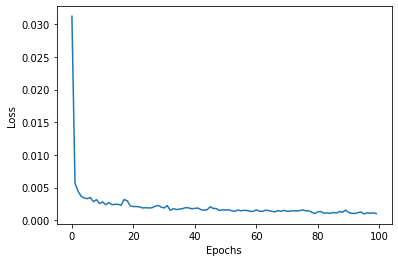

In [18]:
plt.plot(modelo.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [19]:
# Making Predictions:

# Test Data

from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [0]:
import io
test_data = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))

In [0]:
test_data.drop(columns='Unnamed: 0', inplace=True)

In [0]:
real_stock_price = test_data.iloc[: , 3:4].values

In [23]:
test_data

,Date,Close/Last,Volume,Open,High,Low
0,2016-06-02,97.720,40170200,97.60,97.84,96.630
1,2016-06-01,98.460,29139100,99.02,99.54,98.330
2,2016-05-31,99.860,42268040,99.60,100.40,98.820
3,2016-05-27,100.350,36299460,99.44,100.47,99.245
4,2016-05-26,100.410,56293490,99.68,100.73,98.640
...,...,...,...,...,...,...
254,2015-06-01,130.535,32016020,131.20,131.39,130.050
255,2015-05-29,130.280,50474170,131.23,131.45,129.900
256,2015-05-28,131.780,30678840,131.86,131.95,131.100
257,2015-05-27,132.045,45771120,130.34,132.26,130.050


In [0]:
dataset_total = pd.concat([train_data['Open'], test_data['Open']], axis=0)
inputs = dataset_total[len(dataset_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 259):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = model.predict(X_test)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

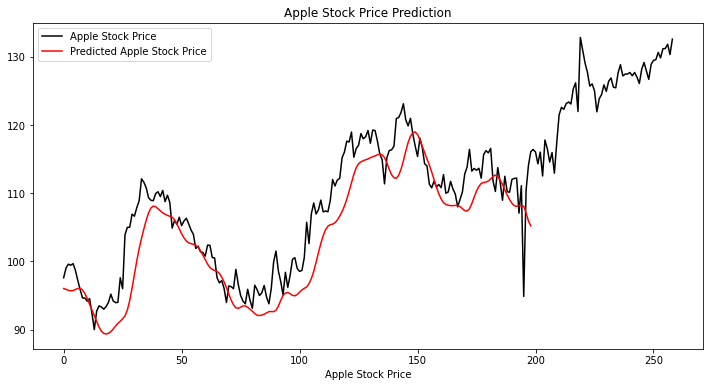

In [39]:
plt.figure(figsize=(12, 6))

plt.plot(real_stock_price, color='black', label='Apple Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Apple Stock Price')
plt.legend()
plt.show()